In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
import seaborn as sns
import copy

In [40]:
para = {}
para.update({
    # general parameters
    'cell_total': 20000,
    'vd_rate': 0.1,
    'infect_ratio': 0.3,
    # Specific infect
    'Spi': 5,
    # Specific proliferation
    'infect_normal_pro_rate': 0.05,
    'infect_cancer_pro_rate': 0.2, 
    # Specific kill
    'kill_normal_rate': 0.02,
    'kill_cancer_rate': 0.2
})

In [41]:
def newgen(virus_cur, cell_cur, para):
    '''
        virus_cur: 1*3: free, infect normal, infect cancer
        cell_cur:  1*2: normal, cancer
    '''
    new_virus_cur = copy.deepcopy(virus_cur)
    new_cell_cur = copy.deepcopy(cell_cur)

    cell_total = para['cell_total']
    # general parameters
    infect_ratio = para['infect_ratio']
    vd_rate = para['vd_rate']
    # Specific infect
    Spi = para['Spi']
    # Specific proliferation
    infect_normal_pro_rate = para['infect_normal_pro_rate']
    infect_cancer_pro_rate = para['infect_cancer_pro_rate']
    # Specific kill
    kill_normal_rate = para['kill_normal_rate']
    kill_cancer_rate = para['kill_cancer_rate']

    new_virus_cur[0] += - vd_rate * virus_cur[0] + infect_normal_pro_rate * virus_cur[1] + infect_cancer_pro_rate * virus_cur[2] - infect_ratio * virus_cur[0]
    new_virus_cur[1] += - vd_rate * virus_cur[1] + (cell_cur[0])/(cell_cur[0] + cell_cur[1] * Spi) * infect_ratio * virus_cur[0]
    new_virus_cur[2] += - vd_rate * virus_cur[2] + (cell_cur[1] * Spi)/(cell_cur[0] + cell_cur[1] * Spi) * infect_ratio * virus_cur[0]
    
    new_cell_cur[0] = max(1, cell_cur[0] - kill_normal_rate * virus_cur[1])
    new_cell_cur[1] = max(1, cell_cur[1] - kill_cancer_rate * virus_cur[2])
    new_cell_cur = new_cell_cur * cell_total / sum(new_cell_cur) 
  
    return new_virus_cur, new_cell_cur

def sim(virus_ini=np.array([10000, 0, 0]), cell_ini=np.array([10000, 10000]), gens=200, figname='automata', para=para):
    virus_life = [virus_ini]
    cell_life = [cell_ini]
    virus_cur = virus_ini
    cell_cur = cell_ini
    for i in range(gens):
        new_virus_cur, new_cell_cur = newgen(virus_cur, cell_cur, para)
        virus_cur = new_virus_cur
        cell_cur = new_cell_cur
        virus_life.append(new_virus_cur)
        cell_life.append(new_cell_cur)
    
    cell_life = np.array(cell_life)
    virus_life = np.array(virus_life)

    t = np.arange(gens + 1)
    virus_states = ['free virus' , 'virus infecting normal cells', 'virus infecting cancer cells']
    cell_states = ['normal cells', 'cancer cells']

    plt.figure(figsize=(20,10))
    for i in range(3):
        plt.subplot(2,2,i+1)
        plt.plot(t, virus_life[:, i])
        plt.title(virus_states[i], fontsize=20)
        plt.xlabel('Time', fontsize=20)

    plt.subplot(2,2,4)
    plt.plot(t, cell_life[:, 0], 'g-', label=cell_states[0])
    plt.plot(t, cell_life[:, 1], 'r-', label=cell_states[1])
    plt.title('cell amount', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.legend(fontsize=20)
    # for i in range(2):
    #     plt.subplot(2,3,4 + i)
    #     plt.plot(t, cell_life[:, i])
    #     plt.title(cell_states[i])

    plt.tight_layout()
    plt.savefig('./' + figname + '.png')
    plt.show()




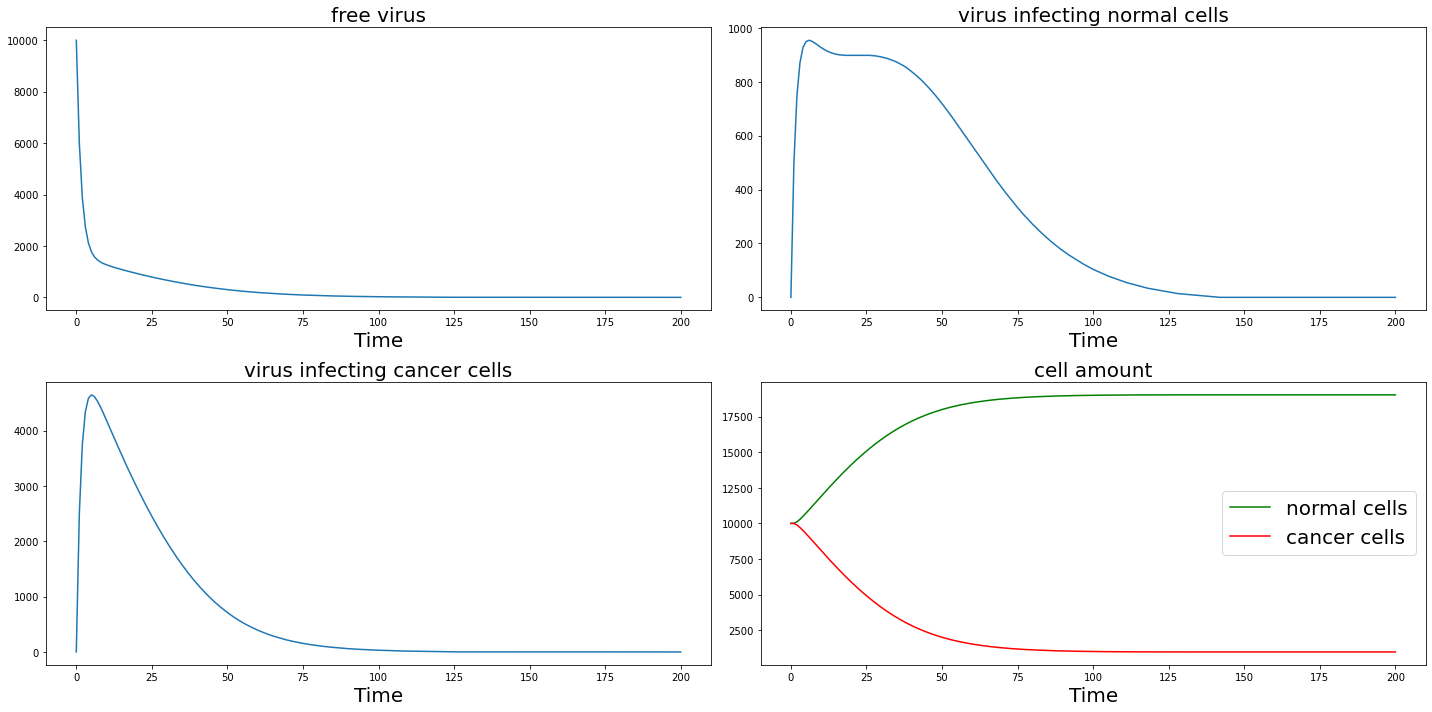

In [42]:
# original
sim(figname='automata_orig')

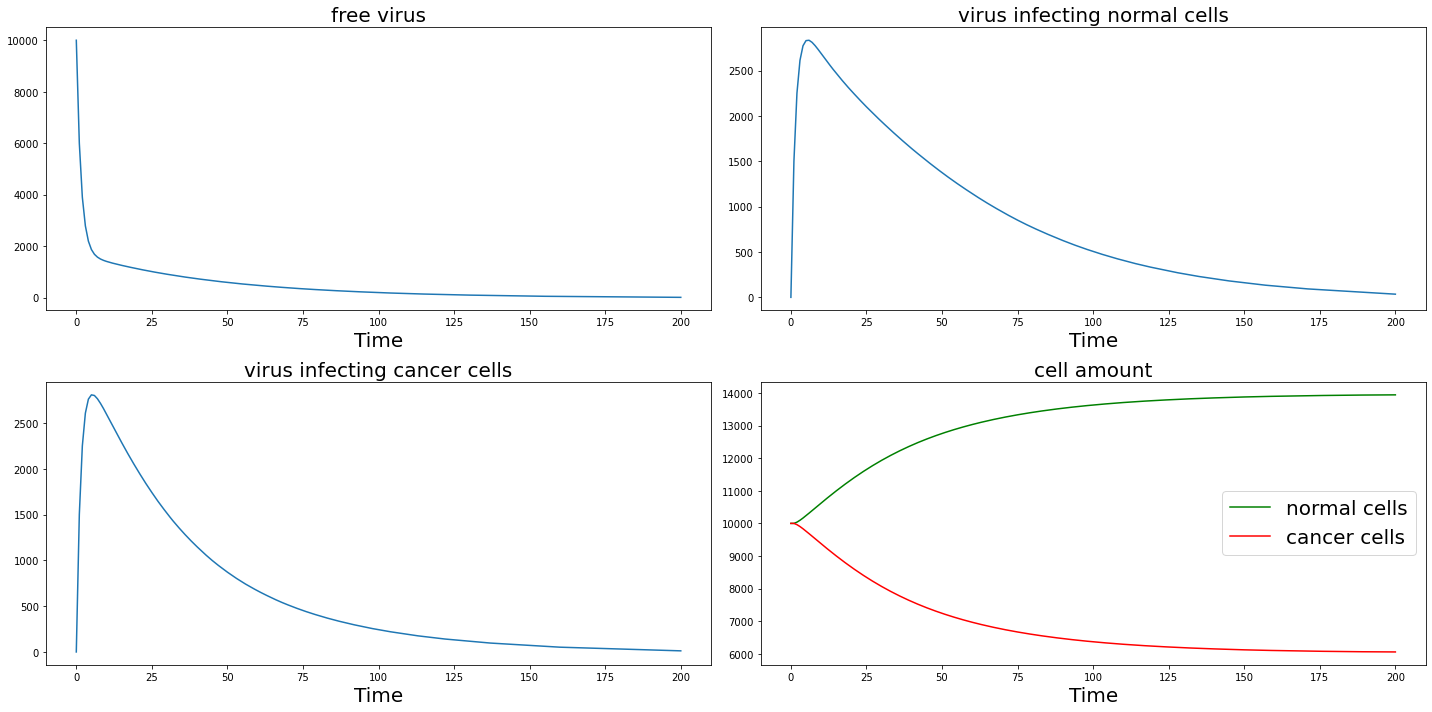

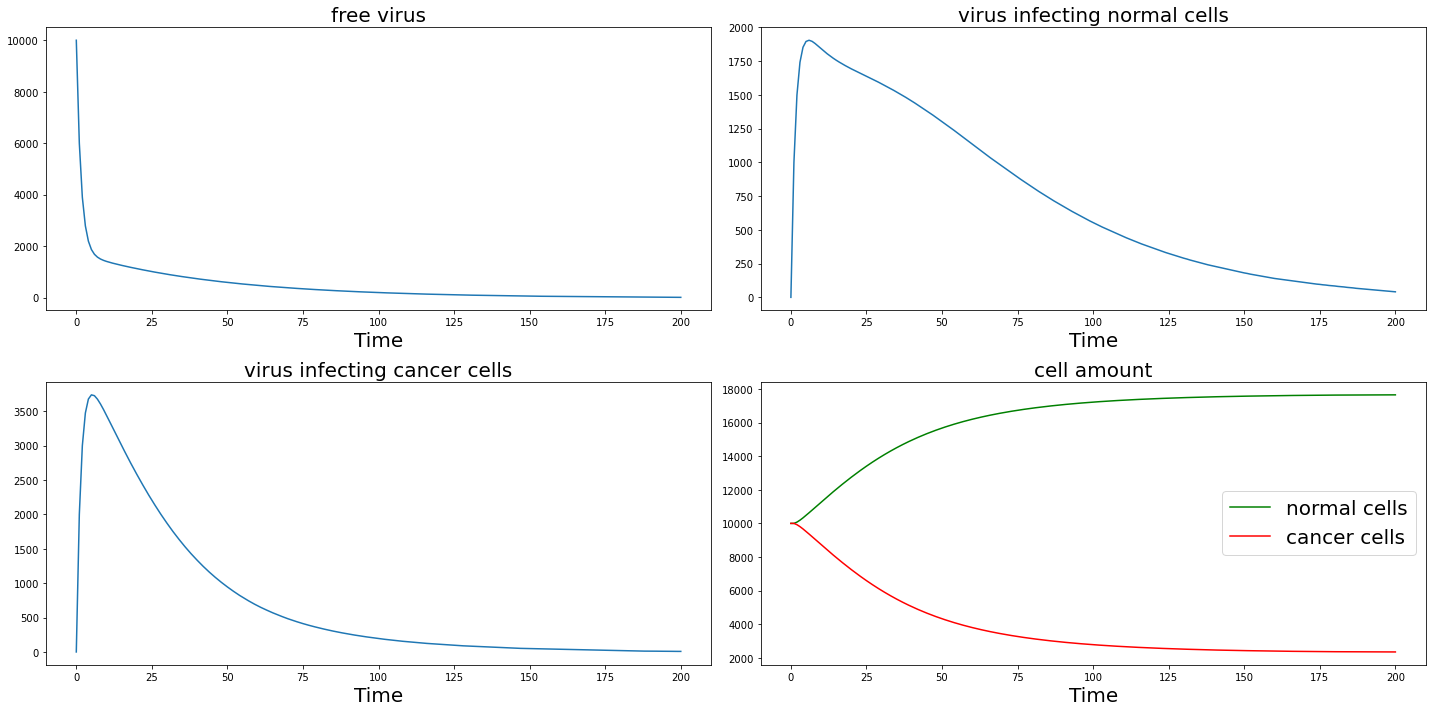

In [47]:
# test specific infect
para2 = para 
para2.update({
    'Spi': 1,
})
sim(figname='automata_spi1', para=para2)

para2.update({
    'Spi': 2,
})
sim(figname='automata_spi2', para=para2)

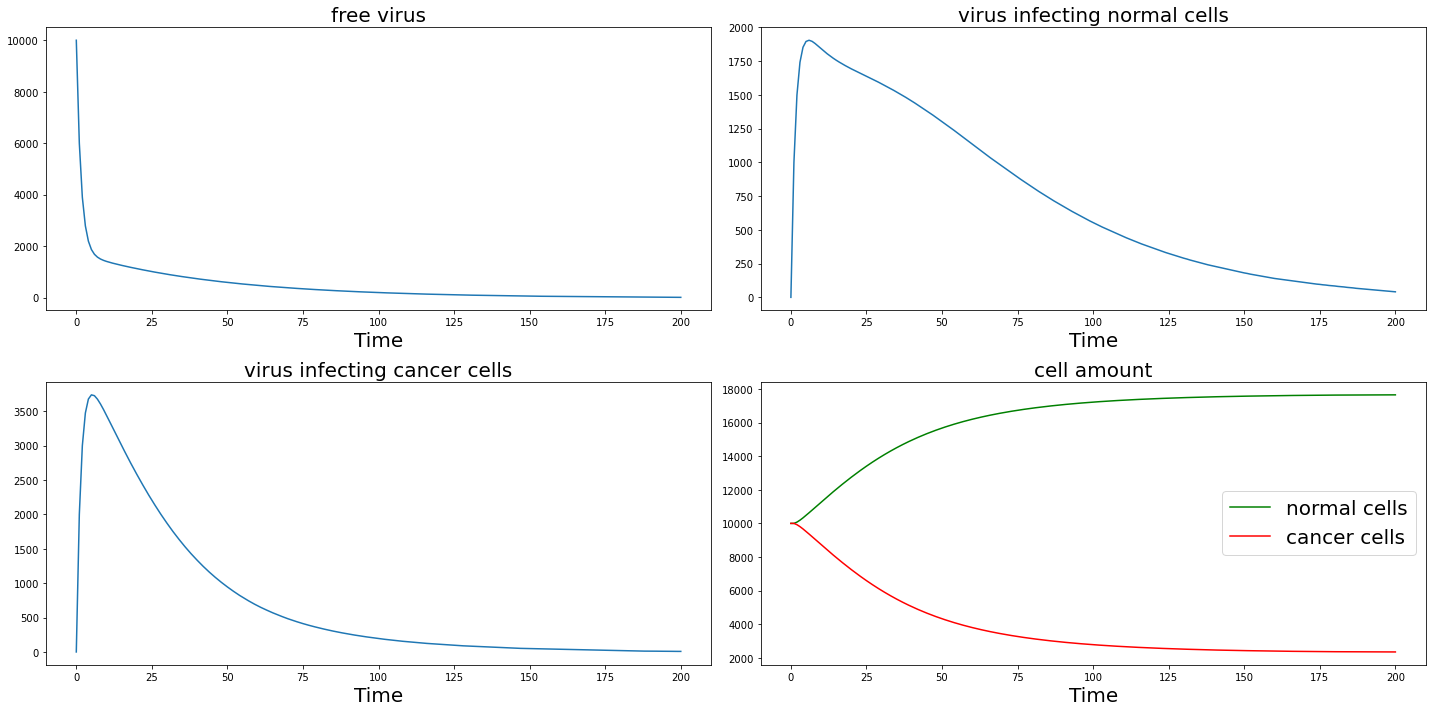

In [48]:

# test specific infect
para3 = para 
para3.update({
    # Specific proliferation
    'infect_normal_pro_rate': 0.1,
    'infect_cancer_pro_rate': 0.1, 
})
sim(figname='automata_pro', para=para3)



In [ ]:

# test specific kill
para4 = para 
para4.update({
    # Specific kill
    'kill_normal_rate': 0.05,
    'kill_cancer_rate': 0.1
})
sim(figname='automata_pro', para=para4)

